In [129]:
#import modules and packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import re
import pip
import inspect
import csv
#inspect objects etc
from inspect import formatargspec, getfullargspec

#analysis and stats
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from rfpimp import *

#imputers
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
from predictive_imputer import predictive_imputer
#data processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

#model selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

#validation and hyperparameter tuning
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#regressors and classifiers
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#predictor packages
from fbprophet import Prophet

In [131]:
%matplotlib inline
sns.set()


In [8]:
#read in datasets
os.chdir("D:\Coding related\Driven Data related\DengAi comp\datasets") #set filepath
# use city, year, weekofyear as mutiindex
df_ori_features = pd.read_csv('dengue_features_train.csv', index_col =[0,1,2])
df_ori_labels = pd.read_csv('dengue_labels_train.csv', index_col =[0,1,2])
df_test = pd.read_csv('dengue_features_test.csv', index_col =[0,1,2])
df_sub = pd.read_csv('submission_format.csv', index_col=[0,1,2])

<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: DeprecationWarning: invalid escape sequence \C
<input>:2: Dep

In [9]:
#split data by cities
sj_feat = df_ori_features.loc['sj'] #san juan dataset
iq_feat = df_ori_features.loc['iq'] #iquitos dataset
print('shape of df with sj data: {}'.format(sj_feat.shape))
print('shape of df with iq data: {}'.format(iq_feat.shape))
sj_feat.to_csv('sj_feat1.csv')
iq_feat.to_csv('iq_feat1.csv')

shape of df with sj data: (936, 21)
shape of df with iq data: (520, 21)


In [13]:
#preliminary EDA 
print(sj_feat.info())
print(iq_feat.info())
#check for NaN
print('NaNs in  sj df: {}'.format(sj_feat.isnull().sum()))
print('NaNs in  iq df: {}'.format(iq_feat.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 936 entries, (1990, 18) to (2008, 17)
Data columns (total 21 columns):
week_start_date                          936 non-null object
ndvi_ne                                  745 non-null float64
ndvi_nw                                  887 non-null float64
ndvi_se                                  917 non-null float64
ndvi_sw                                  917 non-null float64
precipitation_amt_mm                     927 non-null float64
reanalysis_air_temp_k                    930 non-null float64
reanalysis_avg_temp_k                    930 non-null float64
reanalysis_dew_point_temp_k              930 non-null float64
reanalysis_max_air_temp_k                930 non-null float64
reanalysis_min_air_temp_k                930 non-null float64
reanalysis_precip_amt_kg_per_m2          930 non-null float64
reanalysis_relative_humidity_percent     930 non-null float64
reanalysis_sat_precip_amt_mm             927 non-null float64
reanalysis_s

In [14]:
#DATA CLEANING - impute NA values for sj_feat_num and iq_feat_num with fancyimpute MICE default settings
sj_feat_imp = pd.DataFrame(MICE().complete(sj_feat.drop(['week_start_date'], axis=1)), 
                           index=sj_feat.index, 
                           columns=sj_feat.drop(['week_start_date'], axis=1).columns) 
print(sj_feat_imp.info())
iq_feat_imp = pd.DataFrame(MICE().complete(iq_feat.drop(['week_start_date'], axis=1)), 
                           index=iq_feat.index, 
                           columns=iq_feat.drop(['week_start_date'], axis=1).columns)
print(iq_feat_imp.info())

[MICE] Completing matrix with shape (936, 20)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.141
[MICE] Starting imputation round 3/110, elapsed time 0.157
[MICE] Starting imputation round 4/110, elapsed time 0.169
[MICE] Starting imputation round 5/110, elapsed time 0.179
[MICE] Starting imputation round 6/110, elapsed time 0.190
[MICE] Starting imputation round 7/110, elapsed time 0.201
[MICE] Starting imputation round 8/110, elapsed time 0.212
[MICE] Starting imputation round 9/110, elapsed time 0.224
[MICE] Starting imputation round 10/110, elapsed time 0.235
[MICE] Starting imputation round 11/110, elapsed time 0.245
[MICE] Starting imputation round 12/110, elapsed time 0.256
[MICE] Starting imputation round 13/110, elapsed time 0.266
[MICE] Starting imputation round 14/110, elapsed time 0.277
[MICE] Starting imputation round 15/110, elapsed time 0.287
[MICE] Starting imputation round 16/110, elapsed time 0.297
[MI

[MICE] Starting imputation round 16/110, elapsed time 0.144
[MICE] Starting imputation round 17/110, elapsed time 0.154
[MICE] Starting imputation round 18/110, elapsed time 0.164
[MICE] Starting imputation round 19/110, elapsed time 0.173
[MICE] Starting imputation round 20/110, elapsed time 0.184
[MICE] Starting imputation round 21/110, elapsed time 0.195
[MICE] Starting imputation round 22/110, elapsed time 0.205
[MICE] Starting imputation round 23/110, elapsed time 0.215
[MICE] Starting imputation round 24/110, elapsed time 0.224
[MICE] Starting imputation round 25/110, elapsed time 0.235
[MICE] Starting imputation round 26/110, elapsed time 0.254
[MICE] Starting imputation round 27/110, elapsed time 0.274
[MICE] Starting imputation round 28/110, elapsed time 0.286
[MICE] Starting imputation round 29/110, elapsed time 0.297
[MICE] Starting imputation round 30/110, elapsed time 0.306
[MICE] Starting imputation round 31/110, elapsed time 0.317
[MICE] Starting imputation round 32/110,

In [44]:
#EDA of imputed sj and iq
#separate sj and iq test labels
sj_labels = df_ori_labels.loc['sj']
iq_labels = df_ori_labels.loc['iq']

#add sj total cases column to sj and iq _feat_imp df
sj_feat_imp['total_cases'] = sj_labels['total_cases']
iq_feat_imp['total_cases'] = iq_labels['total_cases']

In [45]:
print(sj_feat_imp.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 936 entries, (1990, 18) to (2008, 17)
Data columns (total 21 columns):
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k                936 non-null float64
reanalysis_precip_amt_kg_per_m2          936 non-null float64
reanalysis_relative_humidity_percent     936 non-null float64
reanalysis_sat_precip_amt_mm             936 non-null float64
reanalysis_specific_humidity_g_per_kg    936 non-null float64
reanalysis_

In [38]:
#EDA of imputed sj and iq
#calculate correlations between features 
sj_corr_p = sj_feat_imp.corr() #Pearson
iq_corr_p = iq_feat_imp.corr() #Pearson
sj_corr_s = sj_feat_imp.corr(method='spearman') #Spearman
iq_corr_s = iq_feat_imp.corr(method='spearman') #Spearman

Text(0.5,1,'Pearson correlations for San Juan features and total cases')

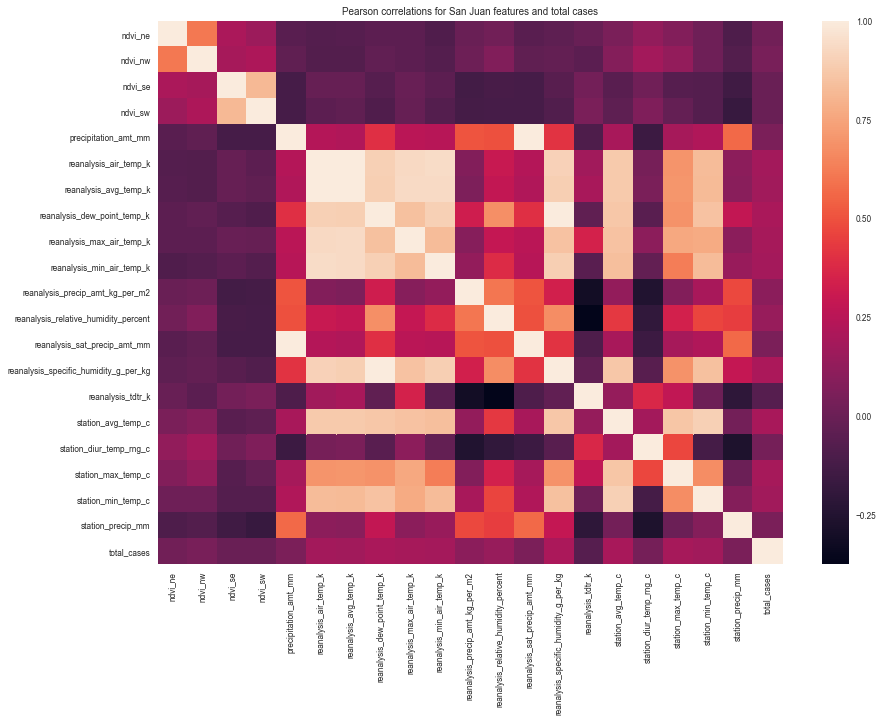

In [39]:
#EDA of imputed sj and iq
#plot sj heatmap from correlations
plt.figure(figsize=(14,10))
sns.heatmap(sj_corr_p)
plt.title('Pearson correlations for San Juan features and total cases')

Text(0.5,1,'Pearson correlations for Iquitos features and total cases')

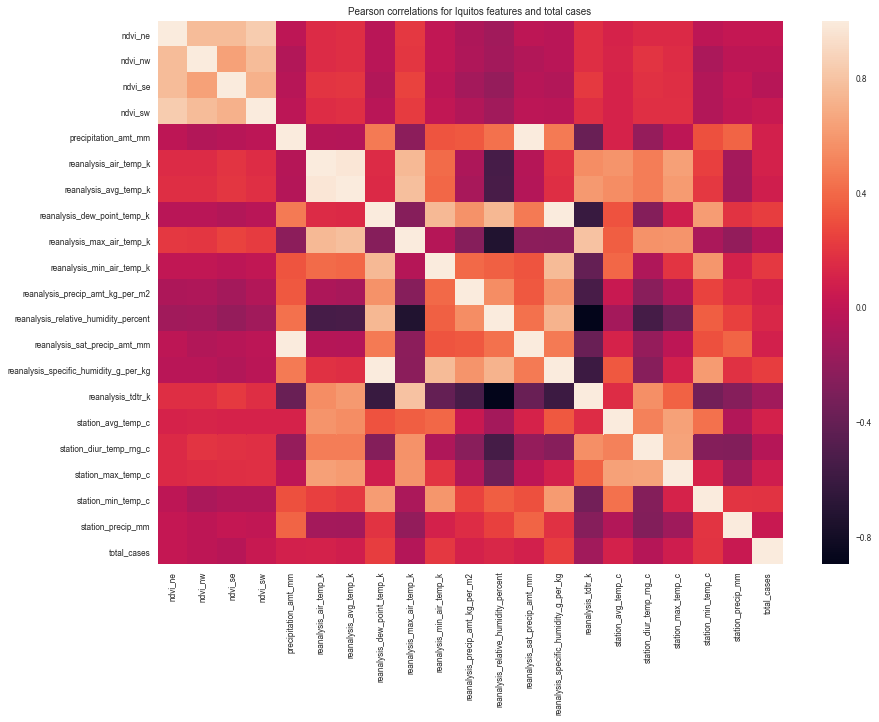

In [40]:
#EDA of imputed sj and iq
#plot iq heatmap from correlations
plt.figure(figsize=(14,10))
sns.heatmap(iq_corr_p)
plt.title('Pearson correlations for Iquitos features and total cases')

In [649]:
#drop precipitation_amt_mm column as it is 100% correlated with reanalysis_sat_precip_amt_mm
#print(sj_corr_p.sort_values('total_cases', ascending=False))

In [157]:
# shift data by 3 weeks (lag by 3 weeks to suit mosquito life-cycle / virus incubation period)
sj_feat_lag = (sj_feat_imp.copy()
               .drop('precipitation_amt_mm', axis=1)
               .shift(periods=3)
               .fillna(method='bfill'))

iq_feat_lag = (iq_feat_imp.copy()
               .drop('precipitation_amt_mm', axis=1)
               .shift(periods=3)
               .fillna(method='bfill'))

In [158]:

print(sj_feat_lag.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 936 entries, (1990, 18) to (2008, 17)
Data columns (total 20 columns):
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k                936 non-null float64
reanalysis_precip_amt_kg_per_m2          936 non-null float64
reanalysis_relative_humidity_percent     936 non-null float64
reanalysis_sat_precip_amt_mm             936 non-null float64
reanalysis_specific_humidity_g_per_kg    936 non-null float64
reanalysis_tdtr_k                        936 non-null float64
station_avg

In [159]:
#Train test split
#sj data
X = sj_feat_lag.drop('total_cases', axis=1)
y = sj_labels['total_cases']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)
print(Xtest.shape)
print(ytest.shape)

(281, 19)
(281,)


In [160]:
#Train test split
#iq data
Xi = iq_feat_lag.drop('total_cases', axis=1)
yi = iq_labels['total_cases']
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3, random_state=42)
print(Xi_test.shape)
print(yi_test.shape)

(156, 19)
(156,)


In [161]:
#fit the model and predict on sj data
rf_untrained = RandomForestRegressor(random_state=42, min_samples_leaf=0.02)
clf_sj = RandomForestRegressor(random_state=42, min_samples_leaf=0.02)
clf_sj.fit(Xtrain, ytrain)
z= clf_sj.predict(Xtest)
z2 = pd.DataFrame(np.round(z), index=Xtest.index, columns=['Predicted Sj Cases'])
print(Xtest.shape)

(281, 19)


In [162]:
#fit the model and predict on iq data
clf_iq = RandomForestRegressor(random_state=42, min_samples_leaf=0.02)
clf_iq.fit(Xi_train, yi_train)
zi= clf_iq.predict(Xi_test)
zi2 = pd.DataFrame(np.round(zi), index=Xi_test.index, columns=['Predicted Iq Cases'])
print(Xi_test.shape)

(156, 19)


In [163]:
#CV rf untrained on training set
sj_train_cv = -cross_val_score(rf_untrained, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
print('CV RMSE train sj: {}'.format(sj_train_cv.mean()**(1/2)))
iq_train_cv = -cross_val_score(rf_untrained, Xi_train, yi_train, cv=10, scoring='neg_mean_squared_error')
print('CV RMSE train iq: {}'.format(iq_train_cv.mean()**(1/2)))

#predict on training set
sj_pred_val = clf_sj.predict(Xtrain)
print('RMSE train pred sj: {}'.format(mean_squared_error(sj_pred_val, ytrain)**(1/2)))
iq_pred_val = clf_iq.predict(Xi_train)
print('RMSE train pred iq: {}'.format(mean_squared_error(iq_pred_val, yi_train)**(1/2)))

#Cross-validation for fitted sj model on test split
score_sj = -cross_val_score(clf_sj, Xtest, ytest, cv=10, scoring='neg_mean_squared_error')
print('CV RMSE test sj: {}'.format(score_sj.mean()**(1/2)))
#Cross-validation for fitted iq model on test split
score_iq = -cross_val_score(clf_iq, Xi_test, yi_test, cv=10, scoring='neg_mean_squared_error')
print('CV RMSE test iq: {}'.format(score_iq.mean()**(1/2)))

#Root mean-squared error (RMSE) for sj/ iq models, test predictions vs actual
print('RMSE test pred sj: {}'.format(mean_squared_error(ytest, z2)**(1/2)))
print('RMSE train pred iq: {}'.format(mean_squared_error(yi_test, zi2)**(1/2)))

CV RMSE train sj: 48.65239314309472
CV RMSE train iq: 11.033283767022075
RMSE train pred sj: 41.34115560066197
RMSE train pred iq: 8.691844739635682
CV RMSE test sj: 54.411491397071856
CV RMSE test iq: 11.543361361630735
RMSE test pred sj: 50.955321997389554
RMSE train pred iq: 9.83257276502377


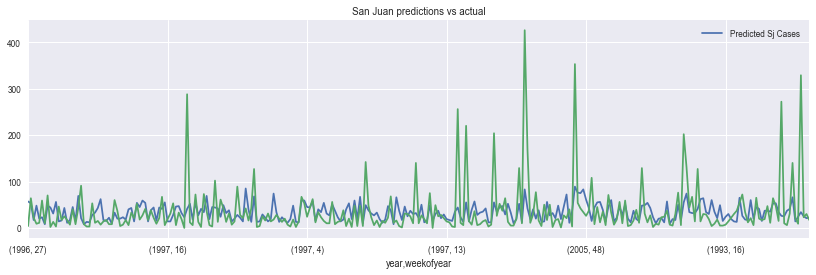

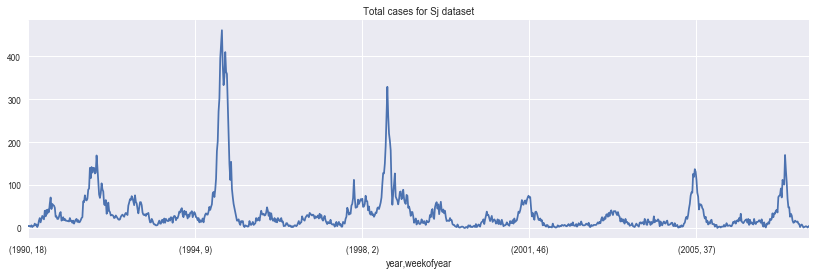

In [164]:
#inspect predictions vs actual
sns.set()
z2.plot(figsize=(14,4),label='Predictions', title='San Juan predictions vs actual')
ytest_df = pd.Series(ytest)
ytest_df.plot(label="Actual")
plt.figure(figsize=(14,4))
sj_labels['total_cases'].plot(title='Total cases for Sj dataset')

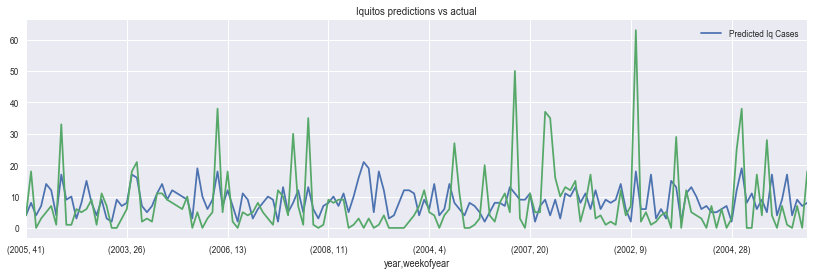

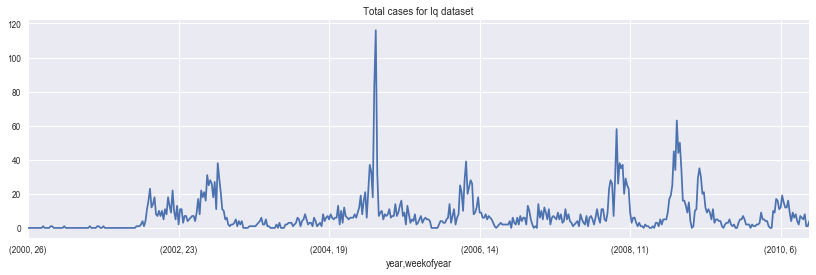

In [165]:
zi2.plot(figsize=(14,4),label='Predictions', title='Iquitos predictions vs actual')
yi_test_df = pd.Series(yi_test)
yi_test_df.plot(label="Actual")
plt.figure(figsize=(14,4))
iq_labels['total_cases'].plot(title='Total cases for Iq dataset')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


Text(0.5,1,'Sj Actual')

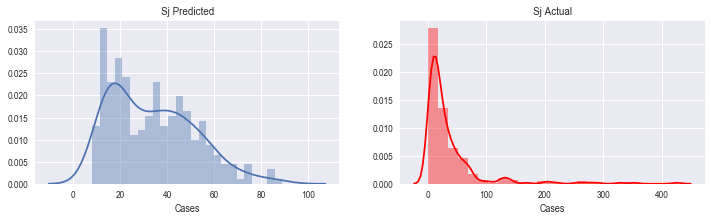

In [166]:
f, axes = plt.subplots(1,2, figsize=(12,3))
sns.distplot(z2, ax=axes[0], bins=25, axlabel='Cases')
sns.distplot(ytest, color='red', bins=25, ax=axes[1], axlabel='Cases')
axes[0].set_title('Sj Predicted')
axes[1].set_title('Sj Actual')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


Text(0.5,1,'Iq Actual')

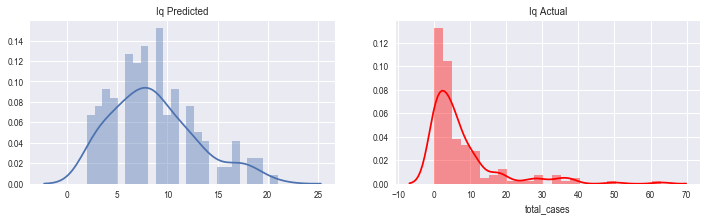

In [167]:
f, axes = plt.subplots(1,2, figsize=(12,3))
sns.distplot(zi2, ax=axes[0], bins=25)
sns.distplot(yi_test, ax=axes[1], bins=25, color='red')
axes[0].set_title('Iq Predicted')
axes[1].set_title('Iq Actual')

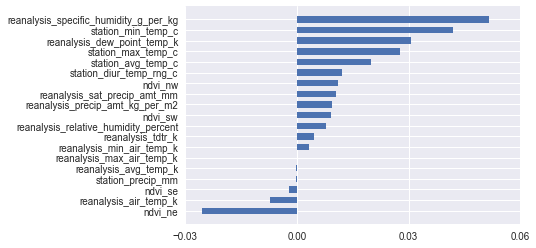

In [168]:
# feature importance assesment 
#sj data 
imp_sj = importances(clf_sj, Xtest, ytest) # permutation
plot_importances(imp_sj)

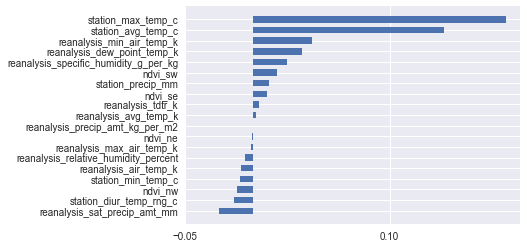

In [169]:
#iq data and fit
imp_iq = importances(clf_iq, Xi_test, yi_test) # permutation
plot_importances(imp_iq)

In [137]:
#set datetime on holdout dataset 
df_holdout = df_test.copy()
df_holdout['week_start_date'] = pd.to_datetime(df_holdout['week_start_date'])
#sort sj and iq data from holdout into separate dfs
sj_hold = df_holdout.loc['sj']
iq_hold = df_holdout.loc['iq']
#print(sj_hold.info())
#print(iq_hold.info())
#print(df_holdout.info())

In [138]:
# impute values in holdout with MICE default settings
# sj dataset
sj_hold_imp = pd.DataFrame(MICE().complete(sj_hold.drop(['week_start_date'], axis=1)), 
                           index=sj_hold.index, 
                           columns=sj_hold.drop(['week_start_date'], axis=1).columns)
print(sj_hold_imp.info())
#iq dataset
iq_hold_imp = pd.DataFrame(MICE().complete(iq_hold.drop(['week_start_date'], axis=1)), 
                           index=iq_hold.index, 
                           columns=iq_hold.drop(['week_start_date'], axis=1).columns)
print(iq_hold_imp.info())

[MICE] Completing matrix with shape (260, 20)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.082
[MICE] Starting imputation round 3/110, elapsed time 0.105
[MICE] Starting imputation round 4/110, elapsed time 0.114
[MICE] Starting imputation round 5/110, elapsed time 0.122
[MICE] Starting imputation round 6/110, elapsed time 0.130
[MICE] Starting imputation round 7/110, elapsed time 0.138
[MICE] Starting imputation round 8/110, elapsed time 0.145
[MICE] Starting imputation round 9/110, elapsed time 0.156
[MICE] Starting imputation round 10/110, elapsed time 0.164
[MICE] Starting imputation round 11/110, elapsed time 0.172
[MICE] Starting imputation round 12/110, elapsed time 0.179
[MICE] Starting imputation round 13/110, elapsed time 0.187
[MICE] Starting imputation round 14/110, elapsed time 0.195
[MICE] Starting imputation round 15/110, elapsed time 0.207
[MICE] Starting imputation round 16/110, elapsed time 0.230
[MI

[MICE] Starting imputation round 91/110, elapsed time 0.186
[MICE] Starting imputation round 92/110, elapsed time 0.189
[MICE] Starting imputation round 93/110, elapsed time 0.191
[MICE] Starting imputation round 94/110, elapsed time 0.193
[MICE] Starting imputation round 95/110, elapsed time 0.195
[MICE] Starting imputation round 96/110, elapsed time 0.198
[MICE] Starting imputation round 97/110, elapsed time 0.200
[MICE] Starting imputation round 98/110, elapsed time 0.202
[MICE] Starting imputation round 99/110, elapsed time 0.204
[MICE] Starting imputation round 100/110, elapsed time 0.207
[MICE] Starting imputation round 101/110, elapsed time 0.209
[MICE] Starting imputation round 102/110, elapsed time 0.212
[MICE] Starting imputation round 103/110, elapsed time 0.214
[MICE] Starting imputation round 104/110, elapsed time 0.216
[MICE] Starting imputation round 105/110, elapsed time 0.219
[MICE] Starting imputation round 106/110, elapsed time 0.221
[MICE] Starting imputation round 

In [576]:
#check if data is MCAR - compare means of pre and post-imputed data
sj_wt = pd.DataFrame(sj.mean().values.reshape(1,-1), columns=sj.columns)
sj_imputed = pd.DataFrame(sj_hold_imp.mean().values.reshape(1,-1), 
                          columns=sj_hold_imp.columns)

#print(sj_wt - sj_imputed)
# as shown below, the means between the unimputed/imputed data very similar, indicated data is MCAR
# Roderick J. A. Little. (1988). A Test of Missing Completely at Random for Multivariate Data with Missing Values. 
# Journal of the American Statistical Association, 83(404), 1198-1202. doi:10.2307/2290157

In [140]:
# compute holdout feature time lags
sj_hold_lag = sj_hold_imp.copy()
sj_hold_lag = sj_hold_lag.shift(periods=3).fillna(method='bfill')
#print(sj_feat_eng.head())
iq_hold_lag = iq_hold_imp.copy()
iq_hold_lag = iq_hold_lag.shift(periods=3).fillna(method='bfill')

In [143]:
#predict on imputed holdout data with trained clfs
sj_pred = clf_sj.predict(sj_hold_lag.drop('precipitation_amt_mm', axis=1)).astype(int)
iq_pred =clf_iq.predict(iq_hold_lag.drop('precipitation_amt_mm', axis=1)).astype(int)

In [144]:
#craft the submission dfs
df_sub['total_cases'] = np.concatenate([sj_pred, iq_pred])
df_sub.to_csv('v2_sub6.csv')
print(df_sub.head())

                      total_cases
city year weekofyear             
sj   2008 18                   16
          19                   16
          20                   16
          21                   16
          22                   10
